# Joblisting Exploratory Data Analysis (EDA)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Setup">Setup</a></li>
    <li>2. <a href="#2.-Loading-the-Data">Loading the Data</a></li>
    <li>3. <a href="#3.-Framing-the-Problem">Framing the Problem</a>
        <ul>
            <li>3.1. <a href="#3.1.-Objective">Objective</a></li>
            <li>3.2. <a href="#3.2.-Procedure">Procedure</a></li>
            <li>3.3. <a href="#3.3.-Design">Design</a></li>
        </ul>
    </li>
    <li>4. <a href="#4.-Previewing-the-Data">Previewing the Data</a></li>
    <li>5. <a href="#5.-Univariate-Non-Graphical-Analysis">Univariate Non-Graphical Analysis</a></li>
    <li>6. <a href="#6.-Univariate-Graphical-Analysis">Univariate Graphical Analysis</a></li>
    <li>7. <a href="#7.-Multivariate-Non-Graphical-Analysis">Multivariate Non-Graphical Analysis</a></li>
    <li>8. <a href="#8.-Multivariate-Graphical-Analysis">Multivariate Graphical Analysis</a></li>
</ul>
</div>

## 1. Setup

+ If the following assertions fail, I believe other versions still work. Just ensure you are not using too outdated libraries (e.g. Python 3.* compared to Python 2.*). These are just the versions I'm using for this project.

In [1]:
# General imports.

# Python ≥ 3.7.9 is used.
import sys
assert sys.version_info >= (3, 7, 9)

import os
import re
import time
from itertools import compress
from collections import Counter
from ordered_set import OrderedSet
from colour import Color


# Specific imports.

# SciPy ≥ 1.6.3 is used.
import scipy
from scipy import stats
assert scipy.__version__ >= "1.6.3"

# NumPy ≥ 1.19.5 is used.
import numpy as np
assert np.__version__ >= "1.18.5"

# Pandas ≥ 1.2.4 is used.
import pandas as pd
assert pd.__version__ >= "1.2.4"

# Matplotlib ≥ 3.4.2 is used.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager
assert mpl.__version__ >= "3.4.2"

# Interactive graphs.
%matplotlib notebook

# Seaborn ≥ 0.11.1 is used.
import seaborn as sns
assert sns.__version__ >= "0.11.1"

# Pandas profiling ≥ 3.0.0 is used.
import pandas_profiling
assert pandas_profiling.__version__ >= "3.0.0"

from pandas_profiling import ProfileReport

# Scikit-learn ≥ 0.24.2 is used.
import sklearn
assert sklearn.__version__ >= "0.24.2"

from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator


# Imbalanced learn ≥ 0.8.0 is used.
import imblearn
assert imblearn.__version__ >= "0.8.0"

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Utility Function(s).

# Borrowed from: 
# https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb.

PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(ax, fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    ax.savefig(path, format=fig_extension, dpi=resolution)

## 2. Loading the Data

In [3]:
PATH = "./input/joblisting_cleaned.csv"
df = pd.read_csv(PATH)

## 3. Framing the Problem

### 3.1. Objective

+ Wrangle, clean, and perform Exploratory Data Analysis (EDA) on the Glassdoor.com joblisting data. Extract useful findings in relationships between estimated salary and other variables. I'll split this EDA into 2 parts: descriptive and exploratory analysis for the first part and question-driven exploration for the second part.

### 3.2. Procedure

1. Setup.
2. Loading the data.
3. Framing the problem.
4. Preview the data.
5. Wrangling and cleaning the data.
6. Univariate non-graphical analysis.
7. Univariate graphical analysis.
8. Multivariate non-graphical analysis. 
9. Multivariate graphical analysis.
10. Organize findings.

Disclaimer: Steps aren't necessarily done sequentially (I may jump back and forth a bit if I come up with an idea about something).

### 3.3. Design

+ 8 total Google sheets will be continually updated throughout the project: 6 sheets for questions, assumption_univariate, conclusion_univariate, and observation_univariate (assumption_multivariate, conclusion_multivariate, observation_multivariate). The last sheet is called miscellaneous_observations and will contain observations about things other than the features themselves.
+ P.S: regardless of what happens to our attributes (whether we add or delete attributes), these main sheets will always *at least* have the original attributes plus any additional attributes.

|              | assumptions              | conclusions              | observations              |
| :----------- | :----------------------- | :----------------------- | :------------------------ |
| univariate   | assumptions_univariate   | conclusions_univariate   | observations_univariate   |
| multivariate | assumptions_multivariate | conclusions_multivariate | observations_multivariate |

+ Assumptions will be updated mostly at the beginning of the project (can still be updated all throughout the project).
+ Conclusions will mostly be done during and at the end of the project (can still be updated all throughout the project). 
+ Observations will, unlike the previous 2, be updated all throughout the project.


+ For this project, I created a diagram to go along and keep track of all the edits I've made. I call this my **edit log**.
+ **Note**: for the 6 sheets I showed in the markdown table above, the assumptions, conclusions, and observations will be denoted by [row, column] and for miscellaneous_observations sheet, I will denote it by [row,].
+ **Note**: Assumptions are kept exclusively on the spreadsheet, Questions are denoted with (❓), conclusions with (📑), and observations with (🔍).


+ I will use a functional design (creating functions for whatever needs this ability) and leaving the rest alone. 
+ I'll try to adhere by Python conventions in PEP8 and [this](https://stackoverflow.com/questions/43577404/purpose-of-import-this) (though I can't promise this will turn out perfectly).

## 4. Previewing the Data

In [4]:
df.head()

,company,rating,headquarters,salary estimate,job type,size,type,sector,revenue
0,Indeed,4.3,"San Francisco, CA",209.0,Full-time,10000+ employees,company - private,information technology,$2 to $5 billion (usd)
1,Indeed,4.3,"San Francisco, CA",143.0,Full-time,10000+ employees,company - private,information technology,$2 to $5 billion (usd)
2,Abl Schools,4.1,"San Francisco, CA",140.0,Full-time,1 to 50 employees,company - private,business services,unknown / non-applicable
3,Amazon,3.8,"Palo Alto, CA",115.0,Full-time,10000+ employees,company - public,information technology,$10+ billion (usd)
4,Thermo Fisher - America,3.8,"San Francisco, CA",134.5,Full-time,10000+ employees,company - public,biotech & pharmaceuticals,$10+ billion (usd)


In [5]:
df.shape

(1701, 9)

In [6]:
df.columns

Index(['company', 'rating', 'headquarters', 'salary estimate', 'job type',
       'size', 'type', 'sector', 'revenue'],
      dtype='object')

In [7]:
df.describe()

,rating,salary estimate
count,1701.000000,1701.000000
mean,4.048148,133.092887
std,0.455067,24.832022
min,2.100000,24.500000
25%,3.800000,119.000000
50%,4.100000,135.500000
75%,4.300000,150.500000
max,5.000000,209.000000


> 🔍 observation_univariate: [0, "founded"].\
 \
 All the values for the "founded" feature are biased\
 because they have a great deal of missing values (-1)\
 and this would skew both the mean, std, and the median and quartiles.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1701 non-null   object 
 1   rating           1701 non-null   float64
 2   headquarters     1701 non-null   object 
 3   salary estimate  1701 non-null   float64
 4   job type         1701 non-null   object 
 5   size             1701 non-null   object 
 6   type             1701 non-null   object 
 7   sector           1701 non-null   object 
 8   revenue          1701 non-null   object 
dtypes: float64(2), object(7)
memory usage: 119.7+ KB


> 🔍 misc_obsvtn: [0,].\
 \
 There are no null or NaN values but they are actually represented as -1s.\
 Everything is an object except for the year founded which is int64.

## 5. Univariate Non-Graphical Analysis

In [9]:
df.index

RangeIndex(start=0, stop=1701, step=1)

In [10]:
df.columns

Index(['company', 'rating', 'headquarters', 'salary estimate', 'job type',
       'size', 'type', 'sector', 'revenue'],
      dtype='object')

In [11]:
df.shape

(1701, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1701 non-null   object 
 1   rating           1701 non-null   float64
 2   headquarters     1701 non-null   object 
 3   salary estimate  1701 non-null   float64
 4   job type         1701 non-null   object 
 5   size             1701 non-null   object 
 6   type             1701 non-null   object 
 7   sector           1701 non-null   object 
 8   revenue          1701 non-null   object 
dtypes: float64(2), object(7)
memory usage: 119.7+ KB


In [13]:
df.describe()

,rating,salary estimate
count,1701.000000,1701.000000
mean,4.048148,133.092887
std,0.455067,24.832022
min,2.100000,24.500000
25%,3.800000,119.000000
50%,4.100000,135.500000
75%,4.300000,150.500000
max,5.000000,209.000000


> 📑 conclusions_univariate: [2, "rating"].\
  \
  The average rating is 4.1 while the minimum is 
  2.1 and the max is 5.0. The median and mean are
  close meaning this distribution is pretty normal.


> 📑 conclusions_univariate: [3, "salary estimate"].\
  \
  Min salary is 37k and the max is 209k. The average
  salary estimate for data scientists on Glassdoor.com
  is around 133k to 135k.

In [14]:
one_joblisting = len(df.company.value_counts()[df.company.value_counts().values == 1])
less_than_10 = len(df.company.value_counts()[df.company.value_counts().values < 10])
n_unique_cmpny = len(df.company.value_counts())

print("Proportion of unique companies that only post 1 joblisting.")
print(f"{one_joblisting}/{n_unique_cmpny} = {one_joblisting/n_unique_cmpny}", end="\n\n")

print("Proportion of unique companies that post less than 10 joblistings.")
print(f"{less_than_10}/{n_unique_cmpny} = {less_than_10/n_unique_cmpny}")

df.company.value_counts()

Proportion of unique companies that only post 1 joblisting.
141/439 = 0.3211845102505695

Proportion of unique companies that post less than 10 joblistings.
408/439 = 0.929384965831435


Facebook                           103
Ursus                               49
Uber                                42
Amazon                              38
Salesforce                          33
                                  ... 
Susquehanna International Group      1
NeuroTrainer                         1
Ryder System                         1
Wider Circle                         1
DTEX Systems                         1
Name: company, Length: 439, dtype: int64

> 📑 conclusions_univariate: [4, "company"].\
  \
  144 companies (out of 443) just have 1 joblisting and\
  412 unique companies out of 443 companies\
  have less than 10 joblistings posted out of the\
  Glassdoor.com joblistings I sampled. Additionally,\
  it seems that Facebook, by far, has the most job offerings\
  for data scientists (as of now, I don't know why).

In [15]:
df.rating.value_counts()

4.3    232
4.1    184
3.8    165
4.0    157
4.4    157
4.2     80
3.6     80
3.7     80
4.5     68
3.4     66
3.9     66
3.5     59
4.8     54
4.7     51
4.6     46
3.3     37
5.0     32
3.2     23
3.0     15
3.1     15
4.9     12
2.8      9
2.1      3
2.5      3
2.3      2
2.6      2
2.9      2
2.7      1
Name: rating, dtype: int64

In [16]:
df.rating.value_counts().sort_index(ascending=False)

5.0     32
4.9     12
4.8     54
4.7     51
4.6     46
4.5     68
4.4    157
4.3    232
4.2     80
4.1    184
4.0    157
3.9     66
3.8    165
3.7     80
3.6     80
3.5     59
3.4     66
3.3     37
3.2     23
3.1     15
3.0     15
2.9      2
2.8      9
2.7      1
2.6      2
2.5      3
2.3      2
2.1      3
Name: rating, dtype: int64

> 📑 conclusions_univariate: [3, "rating"].\
  \
  Most ratings land in the 3.5 to 4.5 range.\
  There are more higher ratings than there are lower ratings.\
  There is no absolute zero (e.g. rating is 0).\
  There is a stagger: most joblistings don't have a\
  3.9 or a 4.2, or 4.5+. And very few companies have low\
  ratings. 

In [17]:
df.headquarters.value_counts()

San Francisco, CA          780
Menlo Park, CA             153
Mountain View, CA           88
Palo Alto, CA               87
San Jose, CA                80
Sunnyvale, CA               73
Santa Clara, CA             60
Redwood City, CA            58
South San Francisco, CA     52
Oakland, CA                 33
Fremont, CA                 31
San Mateo, CA               29
Pleasanton, CA              17
Burlingame, CA              13
Newark, CA                  13
Stanford, CA                10
Foster City, CA              9
Livermore, CA                8
Cupertino, CA                6
Emeryville, CA               6
San Bruno, CA                6
Sacramento, CA               5
Milpitas, CA                 5
Berkeley, CA                 5
East Palo Alto, CA           5
Concord, CA                  4
Rancho Cordova, CA           4
Morgan Hill, CA              4
Petaluma, CA                 4
Hercules, CA                 4
Elk Grove, CA                4
Oakdale, CA                  4
Alameda,

> 📑 conclusions_univariate: [1, "headquarters"].\
  \
  Clearly, most of the joblistings have headquarters in San Francisco, CA.\
  And the top headquarter locations are all in Silicon Valley.\
  It makes sense as this place has traditionally been understood\
  as a tech hotspot for large companies and tech startups.\
  Also, these are all located in CA.

In [18]:
(df["salary estimate"]
 .value_counts()[df["salary estimate"].value_counts().values == 1]
 .sort_index())

37.0     1
47.0     1
51.0     1
53.5     1
69.5     1
74.0     1
76.0     1
78.5     1
80.0     1
82.5     1
90.5     1
92.0     1
94.5     1
99.0     1
102.0    1
106.0    1
157.0    1
170.0    1
178.0    1
186.5    1
187.0    1
192.0    1
193.0    1
196.5    1
199.0    1
203.0    1
209.0    1
Name: salary estimate, dtype: int64

> 📑 conclusions_univariate: [4, "salary estimate"].\
  \
  Clearly looks like there is a huge gap from 106k to\
  157k. This is obvious as most joblistings ask for general data scientists\
  who either aren't seniors or aren't juniors. And those data scientists\
  are generally paid around 135k. And thus, you won't see single occurrences\
  of joblistings around that center. These joblistings are probably\
  looking for specialized or beginners who aren't as experienced as\
  a data scientist with 2 years of job experience.

In [19]:
df["salary estimate"].value_counts().values

array([37, 32, 31, 27, 26, 26, 23, 23, 23, 23, 22, 22, 21, 20, 20, 20, 19,
       19, 19, 18, 18, 18, 18, 17, 17, 17, 17, 16, 16, 16, 16, 16, 16, 16,
       15, 15, 15, 15, 14, 14, 14, 14, 14, 13, 13, 13, 13, 12, 12, 12, 12,
       12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

> 📑 conclusions_univariate: [5, "salary estimate"].\
  \
  Seems like as the salary estimate increases to a decent bit past the\
  center, the higher the chance it is to see more unique salary estimates.\
  Same thing can be said for decreasing the salary estimate. 

In [20]:
df["job type"].value_counts()

Full-time     1663
Part-time       27
Contract         7
Internship       4
Name: job type, dtype: int64

> 📑 conclusions_univariate: [0, "job type"].\
  \
  There is no surprise here that most joblistings are looking\
  for full-time workers. But my curiosity is nagging me:\
  Glassdoor.com is more catered to job seekers and not\
  students who are looking for internships or people looking for a\
  temporary contract. This can reflect the demographics of people who visit\
  Glassdoor.com to be mostly college graduates or people with job experience\
  looking to commit to a full-time job.

In [21]:
df["size"].value_counts()

10000+ employees           596
51 to 200 employees        228
1 to 50 employees          222
1001 to 5000 employees     196
201 to 500 employees       175
501 to 1000 employees      158
5001 to 10000 employees    126
Name: size, dtype: int64

> 📑 conclusions_univariate: [0, "size"].\
  \
  It seems if the "10000+ employees" were removed,\
  then it would be a pretty uniform distribution.\
  However, it seems that most companies with 10000+ employees\
  post on Glassdoor.com. This could support the conclusion that\
  Glassdoor.com's demographics mainly consist of actual job seekers as\
  these larger companies are looking for employees (which most likely\
  means these positions aren't temporary).

In [22]:
df["type"].value_counts()

company - public                  812
company - private                 718
subsidiary or business segment     56
nonprofit organization             50
college / university               37
government                         10
contract                            6
hospital                            6
self-employed                       5
school / school district            1
Name: type, dtype: int64

> 📑 conclusions_univariate: [0, "type"].\
  \
  Most joblistings are understandable:\
  they are from companies, whether they are\
  public or private.

In [23]:
df.sector.value_counts()

information technology                849
biotech & pharmaceuticals             187
business services                     138
finance                               105
retail                                 97
health care                            60
manufacturing                          58
education                              47
insurance                              43
oil, gas, energy & utilities           26
non-profit                             20
media                                  18
transportation & logistics             12
government                             11
real estate                             7
telecommunications                      6
accounting & legal                      6
restaurants, bars & food services       4
construction, repair & maintenance      3
arts, entertainment & recreation        2
agriculture & forestry                  1
travel & tourism                        1
Name: sector, dtype: int64

In [24]:
df.sector.value_counts().iloc[0]/df.sector.value_counts().sum()

0.4991181657848324

> 📑 conclusions_univariate: [0, "sector"].\
  \
  Unsurprisingly, most joblistings on Glassdoor.com are from large tech companies\
  who specialize in information technology or something tech/business related.\
  In fact, half my entire dataset consists of joblistings from companies in the\
  information technology sector.

In [25]:
df.company.value_counts()

Facebook                           103
Ursus                               49
Uber                                42
Amazon                              38
Salesforce                          33
                                  ... 
Susquehanna International Group      1
NeuroTrainer                         1
Ryder System                         1
Wider Circle                         1
DTEX Systems                         1
Name: company, Length: 439, dtype: int64

In [26]:
df.revenue.value_counts()

unknown / non-applicable            662
$10+ billion (usd)                  475
$100 to $500 million (usd)           94
$2 to $5 billion (usd)               94
$1 to $2 billion (usd)               86
$5 to $10 billion (usd)              53
$25 to $50 million (usd)             50
$10 to $25 million (usd)             44
$50 to $100 million (usd)            44
less than $1 million (usd)           32
$500 million to $1 billion (usd)     28
$1 to $5 million (usd)               26
$5 to $10 million (usd)              13
Name: revenue, dtype: int64

> 📑 conclusions_univariate: [0, "revenue"].\
  \
  Weirdly enough, most companies don't provide revenues.\
  Those companies that do provide a revenue, it is usually \\$10+ billion.\
  Assuming my dataset is representative of the joblistings on Glassdoor.com,\
  it seems that larger companies (companies producing larger revenue) tend to post more.\
  However, this is true if we ignore the "unknown / non-applicable".\
  Since there are many companies posting <10 joblistings, there could be a\
  relationship between the scarcity of joblistings from a certain company and the\
  decision for that company to post or not post the revenue.

## 6. Univariate Graphical Analysis

A short foreword: normally I'd pick 1 set of styling tools (font, color palette, design, etc) for a set of graphs, but for this project I'll switch up the styles quite a bit just for fun!

In [27]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

Let's use seaborn-colorblind! This will be helpful if some colors are hard to differentiate.

In [28]:
plt.style.use('seaborn-colorblind')

In [29]:
plt.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

In [30]:
plt.rcParams.update(mpl.rcParamsDefault)

In [31]:
# Here I define a function.
# There are many ways to go about graphing!
# You can write out all the code procedurally or modularize them into functions, or more.

# Works best with the top k=50-ish or less companies
# Which is generally the majority of the companies who post
# multiple joblistings.
def show_top_k(k, df, col, by_freq=False, figsize=(12, 8), font="Comic Sans MS", 
               first_color=(228,155,15),
               second_color=(252, 236, 205), n=1):    
    fig = plt.figure(figsize=figsize)
    
    vc = df[col].value_counts()
    vc_top_k = vc[:k].sort_values(ascending=True)
    
    x = vc_top_k.index
    y = vc_top_k.values/df.shape[0] if by_freq else vc_top_k.values
    
    ax = plt.gca()
    
    c = Color(rgb=tuple([i/255 for i in second_color]))
    colors = [i.get_rgb() for i in list(c.range_to(Color(rgb=tuple([i/255 for i in first_color])), len(x)))]
    range_ = list(range(len(colors)))[-n:]
    colors = [colors[-1] if i in range_ else colors[0] for i in range(len(colors))]
    ax.barh(x, y, color=colors)
        
    if by_freq:
        if k > len(vc_top_k):
            ax.set_title(f"{col} Frequency", fontname=font)
        else:
            ax.set_title(f"Top {k} {col} Frequency", fontname=font)
    else:
        if k > len(vc_top_k):
            ax.set_title(f"{col} Count", fontname=font)
        else:
            ax.set_title(f"Top {k} {col} Count", fontname=font)
        
    if by_freq:
        ax.set_xlabel("Frequency", fontname=font)
    else:
        ax.set_xlabel(f"{col.capitalize()} Count", fontname=font)
    
    ax.set_yticks(np.arange(len(x)))
    ax.set_yticklabels(x, fontname=font)
        
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
        
    ax.tick_params(left=False,bottom=False)
    
    ax.get_xaxis().set_ticks([])
        
    for index, value in enumerate(y):
        plt.text(value + 0.5, index,
                 str(value), fontname=font)
        
    plt.tight_layout(pad=1.2)
    
    return fig

In [32]:
k = 30

fig = show_top_k(k, df, "company", font="Comic Sans MS")
save_fig(fig, f"top_{k}_company_count")

Saving figure top_30_company_count


<IPython.core.display.Javascript object>


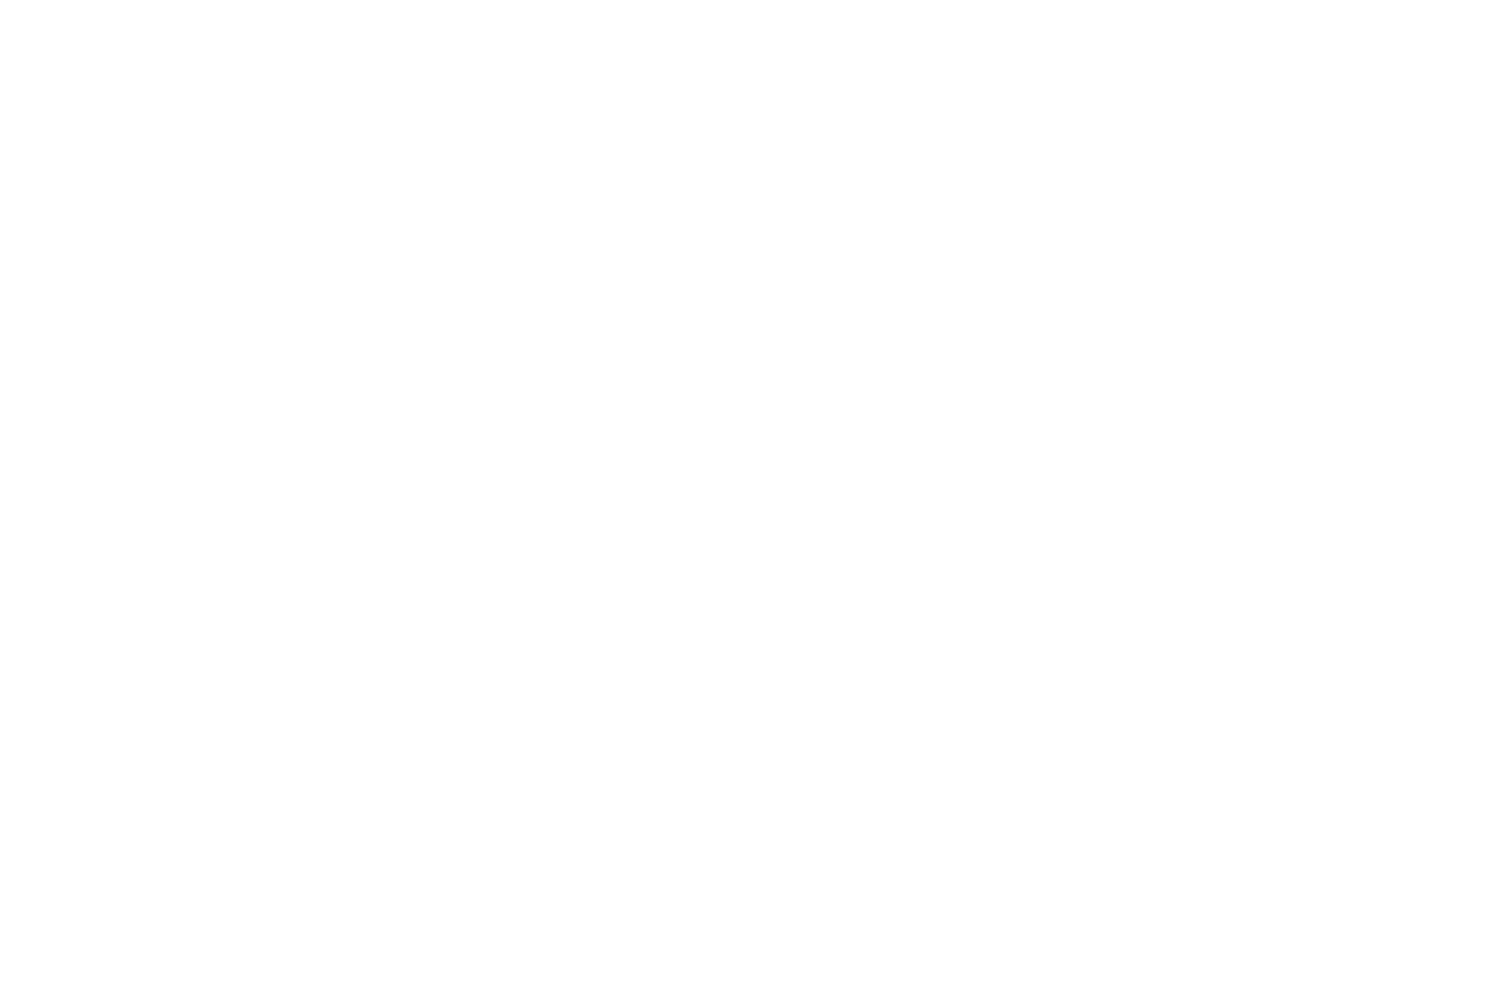

In [33]:
fig

> 📑 conclusions_univariate: [5, "company"].\
  \
  Showing the top k clearly illustrates the\
  how popular Facebook is on Glassdoor! that, or Facebook (now Meta)\
  is hiring an awful lot of people. It does decrease moving down the graph,\
  but it seems, generally, 20 jobs posted is more than enough.

In [34]:
# Here I write the code out procedurally.

font = "Arial"
first_color=(43,140,191)
second_color=(210, 233, 245)

fig = plt.figure(figsize=(6, 4))
ax = plt.gca()

x = df.company.value_counts().values
bins = np.arange(0, 110, 5)

c = Color(rgb=tuple([i/255 for i in second_color]))
colors = [i.get_rgb() for i in list(c.range_to(Color(rgb=tuple([i/255 for i in first_color])), len(bins)))]
colors = [colors[-1] if i == 0 else colors[0] for i in range(len(colors))]

values, bins, patches = ax.hist(x=x, bins=bins)

for p, c in zip(patches, colors):
    p.set_fc(c)

xticks = [int(i) for i in ax.get_xticks() if i >= 0 and (i != 60 and i != 80 and i != 120)]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
ax.set_yticklabels([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(left=False,bottom=False)

ax.set_xlabel("Joblisting Count", font=font)
ax.set_ylabel("Unique Company Count", font=font)
ax.set_title("Unique Company Count Based on Number of Joblistings", font=font)

rects = ax.patches
labels = [int(values[i]) for i in range(len(rects))]
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    if label == 0: continue
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')

plt.text(90, 60, "Facebook", font=font)
plt.arrow(x=97, y=50, dx=4, dy=-25, width=.08) 

    
plt.tight_layout(pad=1.2)

plt.close(1)
plt.show()

save_fig(fig, "cmpny_count_by_jl")

<IPython.core.display.Javascript object>

Saving figure cmpny_count_by_jl


> 📑 conclusions_univariate: [6, "company"].\
  \
  Even though categorical data isn't traditionally used with histograms, I\
  still tried it out anyways. I believe this histogram is showcasing the count\
  of joblistings from every unique company. Out of the 443 companies, a little over\
  400 of them post 0-10 joblistings! And about less than 25 unique companies\
  post 10-20 joblistings. So while Facebook posted by far the most joblistings on Glassdoor.com,\
  the majority of joblistings on Glassdoor.com (assuming my dataset is representative of all joblistings\
  on Glassdoor.com) are from other companies. In retrospect, this might seem really obvious. 

In [35]:
# Works best for k < 20.
k= 500
n = 5
n_cnt = 0

fig = plt.figure(figsize=(6, 4))
company_vc = df.company.value_counts()

colors = sns.color_palette('pastel')[:n] + (sns.color_palette('pastel')[-1:] * (k - n))
    
# Explode Facebook. 
explode_facebook = [0.1 if idx == "Facebook" else 0.0 for idx in company_vc.index]
    
wedges, texts = plt.pie(x=company_vc[:k], 
                        # labels=company_vc.index[:k],
                        explode=explode_facebook[:k],
                        wedgeprops={"edgecolor": None, 
                                    "linewidth": 0},
                        shadow=False,
                        colors=colors)

labels = list(company_vc.index[:n]) + ["Other"]
for i, label in enumerate(labels):
    if label == "Other":
        p = company_vc.iloc[n:].values.sum()/company_vc.values.sum()*100
    else:
        p = company_vc[label]/company_vc.values.sum()*100
        
    labels[i] = labels[i] + " - " + f"{p:1.2f}%"

plt.legend(wedges[:n+1], 
           labels, 
           loc='center left',
           bbox_to_anchor=(1, 0))
plt.title("Joblisting Count per Unique Company")
plt.tight_layout()
    
# Note: the legend goes from the exploded piece counter-clockwise.

save_fig(fig, f"top_{k}_companies_pie" if k < len(company_vc) else f"top_allunique_companies_pie")
fig

Saving figure top_allunique_companies_pie


<IPython.core.display.Javascript object>

In [36]:
fig = plt.figure()

ax = plt.gca()

a = sns.distplot(a=df.rating, bins=np.arange(0, 5, 0.1))
ax.set_title("Distribution Plot on Ratings")
ax.axvline(df.rating.mean(), color="red", label="Mean")
ax.axvline(df.rating.median(), color="blue", label="Median")
ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# ax.set_xticks(xticks)
# ax.set_xticklabels(xticks)
ax.tick_params(left=False,bottom=False)

ax.get_yaxis().set_ticks([])

save_fig(fig, "rating_dist")
fig

C:\Users\alcka\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Saving figure rating_dist


<IPython.core.display.Javascript object>

> 📑 conclusions_univariate: [4, "rating"].\
  \
  This distribution plot supports the conclusion I made earlier about the ratings.\
  There is also a gap in 3.9 and 4.2. However, this distribution plot does show\
  peakness and a somewhat bell-like curve shape. The curve is skewed leftwards as\
  there are either no ratings in the lower end and/or the ratings are not dense.\
  Moreover, the mean and median seem to line up pretty well with the densest bar.

In [37]:
fig = plt.figure(figsize=(10, 8))

ax = plt.gca()

ax.tick_params(left=False,bottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.countplot(x=df.rating)

rating_vc = df.rating.value_counts().sort_index(ascending=True)

for i, (_, y) in enumerate(rating_vc.iteritems()):
    if y >= 100: 
        plt.text(i-0.35, y + 5, str(y), fontsize=9.5)
    elif y >= 10:
        plt.text(i-0.25, y + 5, str(y), fontsize=9.5)
    else:
        plt.text(i-0.125, y + 5, str(y), fontsize=9.5)

ax.set_title("Rating Counts")

ax.get_yaxis().set_ticks([])
ax.set_ylabel("")

save_fig(fig, "rating_countplot")
fig

Saving figure rating_countplot


<IPython.core.display.Javascript object>

> 📑 conclusions_univariate: [5, "rating"].\
  \
  Much like the distribution plot above, this is "skewed" left.\
  There are few joblistings with low ratings and mostly reside\
  within 1 standard deviation from the mean (a visual estimate).

In [38]:
fig = plt.figure(figsize=(6, 4))


ax = plt.gca()

ax.tick_params(left=False,bottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.boxplot(x=df.rating, flierprops=dict(marker='x', markerfacecolor='0.5', markersize=10))

quantiles = np.quantile(df.rating, np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.0, zorder=0)
# ax.set_xticks(quantiles)

for i, q in enumerate(quantiles):
    if i == 0: 
        plt.text(q - 0.05, 0.15, q, fontsize=9.5)
    elif i == 4:
        plt.text(q - 0.05, 0.325, q, fontsize=9.5)
    else:
        plt.text(q - 0.05, 0.525, q, fontsize=9.5)

ax.set_xlabel("")
ax.get_xaxis().set_ticks([])

ax.set_title("Rating")

save_fig(fig, "rating_boxplot")
fig

Saving figure rating_boxplot


<IPython.core.display.Javascript object>

> 📑 conclusions_univariate: [6, "rating"].\
  \
  Yep, these are outliers (though maybe outliers are calculated via Q1 - 1.5 * IQR?).\
  These outliers aren't very dense in nature and skew the distribution. 

In [39]:
k = 10
first_color = (255,221,120)
second_color = (253,191,111)

fig = plt.figure(figsize=(6, 8))

ax = plt.gca()

ax.tick_params(left=False,bottom=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

x = df.headquarters.value_counts().index[:k]
y = df.headquarters.value_counts().values[:k]

c = Color(rgb=tuple([i/255 for i in second_color]))
colors = [i.get_rgb() for i in list(c.range_to(Color(rgb=tuple([i/255 for i in first_color])), len(x)))]

plt.bar(x=x, height=y, color=colors)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")
    
for i, value in enumerate(y):
    if value >= 100: 
        plt.text(i-0.275, value + 5, str(value), fontsize=9.5)
    elif value >= 10:
        plt.text(i-0.175, value + 5, str(value), fontsize=9.5)
    else:
        plt.text(i-0.125, value + 5, str(value), fontsize=9.5)
    
ax.get_yaxis().set_ticks([])

ax.set_title("Unique Headquarters Counts")

save_fig(fig, "hq_bar_count")
fig

Saving figure hq_bar_count


<IPython.core.display.Javascript object>

> 📑 conclusions_univariate: [6, "headquarters"].\
  \
  Unsurprisingly, lots of jobs are located in San Francisco. And those that aren't are\
  within Silicon Valley. Interesting that South San Francisco is much lower than San Francisco.\
  What factors could lead to such a low representation?

In [40]:
f = plt.figure()
f.clear()
plt.close(f)

In [41]:
plot = sns.displot(x=df["salary estimate"])

plt.axvline(df["salary estimate"].mean(), color="blue", label="Mean")
plt.axvline(df["salary estimate"].median(), color="red", label="Median")
plt.axvline(df["salary estimate"].mean() + df["salary estimate"].std(), color="green", label="z-score=+1/-1")
plt.axvline(df["salary estimate"].mean() - df["salary estimate"].std(), color="green")
plt.xlabel(xlabel="Salary Estimate")
plt.title("Salary Estimate Distribution (in thousands)")
plt.grid(False)
plt.legend()
plt.close(1)
plt.show()

save_fig(plot, "salary_est_dist")

<IPython.core.display.Javascript object>

Saving figure salary_est_dist


> 📑 conclusions_univariate: [6, "salary estimate"].\
  \
  This does seem much like a normal distribution with a slight left skewness, and a peak.\
  It seems that the peak is around the 140k-150k salary range which is really close\
  to the mean and median.

In [42]:
fig = plt.figure(figsize=(8, 6))

sns.boxplot(x=df["salary estimate"], flierprops=dict(markerfacecolor='0.5', markersize=5), color=np.array([68,170,175])/255)

quantiles = np.quantile(df["salary estimate"], np.array([0.00, 0.25, 0.50, 0.75, 1.00]))
for i, q in enumerate(quantiles):
    if i == 0: 
        plt.text(q, 0.05, q, fontsize=7)
    elif i == 4:
        plt.text(q - 0.05, 0.05, q, fontsize=7)
    else:
        plt.text(q - 0.05, 0.45, q, fontsize=7)

ax = plt.gca()
        
ax.tick_params(left=False,bottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.xlabel("")
plt.title("Salary Estimate (in thousands)")
plt.grid(False)

plt.close(1)
plt.show()

save_fig(fig, "salary_est_boxplot")

<IPython.core.display.Javascript object>

Saving figure salary_est_boxplot


In [43]:
# Considering how few unique values there are, we
# don't need a visualizer.
df["job type"].value_counts()

Full-time     1663
Part-time       27
Contract         7
Internship       4
Name: job type, dtype: int64

> 📑 conclusions_univariate: [6, "job type"].\
  \
  This is interesting. We searched for data science jobs, but we got a few part-time, contract, and\
  internship positions. This is due to Glassdoor's minute imprecision in job searching. 

In [44]:
fig = plt.figure(figsize=(10, 6))

size_vc = df["size"].value_counts()
order = sorted(size_vc.index, key = lambda x: int(re.search(r'\d+', x).group()))
plot = sns.countplot(data=df, x="size", order=order, palette="dark:#5A9_r")

heights = [x.get_height() for x in plot.containers[0]]
for i, h in enumerate(heights):
    plt.text(i, h + 5, str(h), fontsize=12, ha="center")
    
ax = plt.gca()
    
ax.get_yaxis().set_ticks([])
plot.set(yticklabels=[])
ax.tick_params(left=False,bottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

plt.xticks(rotation=45, ha="right")
plt.xlabel("")
plt.ylabel("")
plt.title("Company Size Counts")
plt.tight_layout()
plt.close(1)
plt.show()

save_fig(fig, "size_bar")

<IPython.core.display.Javascript object>

Saving figure size_bar


> 📑 conclusions_univariate: [6, "size"].\
  \
  Of course, Silicon Valley is dominated by large tech companies, employing tens of thousands of workers.\
  What surprised me here is how (near) uniform the rest of the graph was. It's a strong trend that companies\
  regardless of size tend to leverage social joblisting platforms for recruitment. Probably even as their primary\
  source of talent acquisition!

In [45]:
k = 15

fig = show_top_k(k, df, "type", first_color=(197,95,69), second_color=(230,202,196), n=2, font="Helvetica")
plt.close(1)
plt.tight_layout()
plt.show()
save_fig(fig, "allunique_type_count")

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>

Saving figure allunique_type_count


> 📑 conclusions_univariate: [6, "type"].\
  \
  Expectedly, private and public companies leverage data scientists the most.\
  However, these 2 categories branch over many different sectors. The "type" column\
  seems like a rough estimate of what *sector* the joblisting entails. Interestingly,\
  schools and universities *hire* data scientists!

In [46]:
# Our fonts!
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\Franklin Gothic Pro-BookItalic.ttf',
 'C:\\Windows\\Fonts\\GOTHIC.TTF',
 'C:\\Windows\\Fonts\\micross.ttf',
 'C:\\Windows\\Fonts\\calibrii.ttf',
 'C:\\Windows\\Fonts\\seguihis.ttf',
 'C:\\Windows\\Fonts\\impact.ttf',
 'C:\\Windows\\Fonts\\AGENCYR.TTF',
 'C:\\Windows\\Fonts\\mmrtextb.ttf',
 'C:\\Windows\\Fonts\\tahoma.ttf',
 'C:\\Windows\\Fonts\\consolai.ttf',
 'C:\\Windows\\Fonts\\SitkaZ.ttc',
 'C:\\Windows\\Fonts\\verdanab.ttf',
 'C:\\Windows\\Fonts\\calibriz.ttf',
 'C:\\Windows\\Fonts\\tolei.ttf',
 'C:\\Windows\\Fonts\\calibrili.ttf',
 'C:\\Windows\\Fonts\\segoeprb.ttf',
 'C:\\Windows\\Fonts\\HATTEN.TTF',
 'C:\\Windows\\Fonts\\BKANT.TTF',
 'C:\\Windows\\Fonts\\l_10646.ttf',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\Avignon Pro-BoldItalic.ttf',
 'C:\\Windows\\Fonts\\corbell.ttf',
 'C:\\Windows\\Fonts\\FRSCRIPT.TTF',
 'C:\\Windows\\Fonts\\seguisbi.ttf',
 'C:\\Windows\\Fonts\\seguibli.ttf',
 'C:\\Windows\\Fonts\\ERASBD.TTF',
 'C:\\Windows\\Fonts\\we

In [47]:
k = 15

fig = show_top_k(k, df, "sector", first_color=(45,33,67), second_color=(191,217,231), font="papyrus")
plt.close(1)
plt.tight_layout()
plt.show()
save_fig(fig, f"top_{k}_sector_count")

<IPython.core.display.Javascript object>

Saving figure top_15_sector_count


> 📑 conclusions_univariate: [6, "sector"].\
  \
  "Sector" overlaps with "type". It gives more insight into the actual industry/sector the role\
  is suited for. There are a lot more unique categories! I know data scientists have domains in which\
  they work in, but I had no idea there were this many industries: education, transportation, oil & gas, etc!\
  Information technology, as expected, trumps all other sectors. However, it is also interesting to see\
  the runner up, biotech & pharma, is actually above business services and finance. Why is this demand\
  so high?

In [48]:
k = 15

fig = show_top_k(k, df, "revenue", first_color=(52,194,224), second_color=(172, 230, 242), n=2, font="Helvetica")
plt.close(1)
plt.tight_layout()
plt.show()
save_fig(fig, "allunique_revenue_count")

<IPython.core.display.Javascript object>

Saving figure allunique_revenue_count


> 📑 conclusions_univariate: [6, "revenue"].\
  \
  Generally, the smaller the company, the less joblistings they can afford to post.\
  Larger companies pool lots of their applications into Glassdoor (and LinkedIn, Indeed, etc).\
  Interestingly, a lot of companies didn't list their revenue. This "null" category can encompass\
  anything from the non-profit organization to simply a volunteer bias.

## 7. Multivariate Non-Graphical Analysis

Alright, let's analyze multiple variables! This will be a little more free-form.

In [49]:
df.head()

,company,rating,headquarters,salary estimate,job type,size,type,sector,revenue
0,Indeed,4.3,"San Francisco, CA",209.0,Full-time,10000+ employees,company - private,information technology,$2 to $5 billion (usd)
1,Indeed,4.3,"San Francisco, CA",143.0,Full-time,10000+ employees,company - private,information technology,$2 to $5 billion (usd)
2,Abl Schools,4.1,"San Francisco, CA",140.0,Full-time,1 to 50 employees,company - private,business services,unknown / non-applicable
3,Amazon,3.8,"Palo Alto, CA",115.0,Full-time,10000+ employees,company - public,information technology,$10+ billion (usd)
4,Thermo Fisher - America,3.8,"San Francisco, CA",134.5,Full-time,10000+ employees,company - public,biotech & pharmaceuticals,$10+ billion (usd)


In [50]:
df.columns

Index(['company', 'rating', 'headquarters', 'salary estimate', 'job type',
       'size', 'type', 'sector', 'revenue'],
      dtype='object')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1701 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1701 non-null   object 
 1   rating           1701 non-null   float64
 2   headquarters     1701 non-null   object 
 3   salary estimate  1701 non-null   float64
 4   job type         1701 non-null   object 
 5   size             1701 non-null   object 
 6   type             1701 non-null   object 
 7   sector           1701 non-null   object 
 8   revenue          1701 non-null   object 
dtypes: float64(2), object(7)
memory usage: 119.7+ KB


In [52]:
df.describe()

,rating,salary estimate
count,1701.000000,1701.000000
mean,4.048148,133.092887
std,0.455067,24.832022
min,2.100000,24.500000
25%,3.800000,119.000000
50%,4.100000,135.500000
75%,4.300000,150.500000
max,5.000000,209.000000


In [53]:
df.corr()

,rating,salary estimate
rating,1.000000,0.190199
salary estimate,0.190199,1.000000


> 📑 conclusions_multivariate: [0, "rating", "salary estimate"].\
  \
  Seems like rating doesn't have much correlation to salary estimate\
  as the Pearson correlation coefficient isn't near 1 or -1. In fact,\
  it is closer to 0 (even though it might show some weak positive correlation\
  to salary estimate, which does make sense as higher rated companies tend\
  to compensate better).

In [55]:
# Even though our ultimate objective is to observe salary estimate,
# we will also look at correlations between other variables
# since this is EDA.

agg_funcs = ["mean", "median", "count", "min", "max"]
size_by_rating = df.groupby(["size"]).rating.agg(agg_funcs)
size_by_rating.name = "Company Size By Rating Stats"

# Creating MultiIndex for visual clarity.
size_by_rating.columns = pd.MultiIndex.from_tuples([("rating", agg_func) 
                                                     for agg_func in agg_funcs])

# Finding the midpoint between the min and the max.
size_by_rating[("rating", "min_max_midpt")] = (size_by_rating[("rating", "min")] + 
                                               size_by_rating[("rating", "max")])/2

# Sorting the index.
size_idx = dict(zip(list(size_by_rating.index), 
                    [int(re.search(r"\d+", x).group(0))
                     for x in list(size_by_rating.index)]))
size_idx_sorted = dict(sorted(size_idx.items(), key=lambda item: item[1]))
size_by_rating = size_by_rating.reindex(size_idx_sorted.keys())

# Number of outliers for each unique company size.
n_zscore = 2
size_n_outliers = [np.sum(arr) 
                   for arr in [np.abs(stats.zscore(df[df["size"] == x]
                                                   ["rating"])) > n_zscore
 for x in size_idx_sorted.keys()]]
size_by_rating[("rating", "n_outliers")] = size_n_outliers

size_by_rating

rating                                       \
                             mean median count  min  max min_max_midpt   
size                                                                     
1 to 50 employees        4.230180   4.35   222  2.3  5.0          3.65   
51 to 200 employees      4.152193   4.20   228  2.1  5.0          3.55   
201 to 500 employees     4.040000   4.00   175  2.5  5.0          3.75   
501 to 1000 employees    3.901899   3.90   158  3.0  4.7          3.85   
1001 to 5000 employees   3.927551   4.00   196  3.1  4.8          3.95   
5001 to 10000 employees  4.028571   4.10   126  3.4  4.6          4.00   
10000+ employees         4.025503   4.10   596  3.1  4.7          3.90   

                                    
                        n_outliers  
size                                
1 to 50 employees               17  
51 to 200 employees             11  
201 to 500 employees             7  
501 to 1000 employees            0  
1001 to 5000 employees          14  
5001 to 10000 employees          0  
10000+ employees                28

In [61]:
size_by_rating.to_csv("./csv/size_by_rating_desc_stats.csv", index=False)

> 📑 conclusions_multivariate: [0, "size", "rating"].\
  \
  For the most part, all rating means stay by the 3.9-4.0 range for companies\
  of all unique sizes. However, it does seem that companies with\
  1 to 50 employees has a slightly higher average rating at 4.2. In fact,\
  the median rating for companies with 1-50 employees is 4.35, higher than\
  all the other unique values. The higher median could be a result of \
  the 16 outliers dragging down the mean. Perhaps, the higher rating for \
  smaller companies comes from the fact that they have better working environments.\
  Or perhaps, they are more flexible than larger companies. Or perhaps, they \
  can more easily cater to each individual worker's needs. There is a wealth\
  of possibilities. It also seems that smaller companies in general (<=500)\
  are receiving 5.0 ratings. I noticed the midpoints of the min and max are \
  consistently lower than the mean and median. It seems that lots of companies,\
  regardless of size, have certain outliers that rate them lower than the norm.\
  Each unique size value has outliers except for 2 of them. Companies with over\
  10000 employees have an especially large number of outliers. This could be due to\
  a greater number of mixed opinions over how large corporations communicate with employees,\
  job seekers, and their consumers and other groups.

In [88]:
revenue_vc = df.revenue.value_counts()

# Rough revenue parser.
values = []
for x in revenue_vc.index:
    if "million" in x:
        value = int(re.search(r'\d+', x).group()) * 1_000_000
    elif "billion" in x:
        value = int(re.search(r'\d+', x).group()) * 1_000_000_000
    else:
        value = 0
        
    values.append(value)
    
order = revenue_vc.index[np.argsort(values)]

size_by_revenue_of_salary_est = (df
                   .pivot_table(values="salary estimate", index="size", columns="revenue")
                   .reindex(size_idx_sorted.keys())
                   .reindex(order, axis=1))
size_by_revenue_of_salary_est

,unknown / non-applicable,less than $1 million (usd),$1 to $5 million (usd),$5 to $10 million (usd),$10 to $25 million (usd),$25 to $50 million (usd),$50 to $100 million (usd),$100 to $500 million (usd),$500 million to $1 billion (usd),$1 to $2 billion (usd),$2 to $5 billion (usd),$5 to $10 billion (usd),$10+ billion (usd)
size,,,,,,,,,,,,,
1 to 50 employees,130.207865,124.051724,142.833333,135.250000,120.750000,137.000000,NaN,126.000000,NaN,NaN,NaN,NaN,NaN
51 to 200 employees,129.425466,120.333333,137.750000,145.944444,109.384615,105.857143,128.722222,121.700000,NaN,NaN,NaN,NaN,NaN
201 to 500 employees,132.616162,NaN,122.538462,NaN,118.437500,115.892857,93.500000,133.937500,166.000000,NaN,NaN,NaN,NaN
501 to 1000 employees,132.607527,NaN,NaN,NaN,143.300000,NaN,132.115385,119.382353,142.500000,141.800000,141.000000,128.375000,NaN
1001 to 5000 employees,143.652941,NaN,NaN,NaN,NaN,118.250000,98.000000,124.851064,134.611111,126.833333,149.750000,144.000000,123.600000
5001 to 10000 employees,110.418919,NaN,114.750000,NaN,NaN,NaN,NaN,NaN,136.100000,144.858974,127.326087,174.500000,136.178571
10000+ employees,93.277778,NaN,NaN,NaN,87.500000,104.425000,NaN,NaN,97.900000,113.708333,135.443548,147.402174,142.778912


In [90]:
df["salary estimate"].mean()  # Keeping this number in mind!

133.09288653733097

In [141]:
size_by_revenue_of_salary_est.to_csv("./csv/size_by_revenue_of_salary_est.csv", index=False)

> 📑 conclusions_multivariate: [0, "size", "revenue", "salary estimate"].\
  \
  Some nice insights! First off, Notice that generally moving from the left to the right column (excluding the unknown col), you see less in the lower triangle and more in the upper. Larger companies generate more revenue and thus they hire more workers. Smaller companies don't generate as much revenue and thus they have less workers. As logic follows, the 87.5 outlier is a large company generating lower than expected revenue. What's also interesting is that the salary estimate is roughly the same more or less across the entire matrix. For smaller companies to compete in acquiring talent, they need a competitive salary (and thus a smaller amount of employees). If we divided the matrix in quadrants. Q1 is small companies with high revenues (which is non-existent), Q2 is small companies lower revenue, Q3 is large company lower revenue, and Q4 is large company high revenue.

In [127]:
# Let's quickly take a look at size by salary estimate. 
size_by_salary = (df
 .groupby(by="size")
 .agg(["mean", "std", "median", "count", "min", "max"])
 [["salary estimate"]]
 .reindex(size_idx_sorted.keys())
)

size_by_salary

salary estimate                                      
                                   mean        std  median count   min    max
size                                                                         
1 to 50 employees            129.567568  19.895426  133.75   222  74.5  187.5
51 to 200 employees          127.043860  22.428993  129.00   228  53.5  178.0
201 to 500 employees         126.677143  29.072987  130.00   175  24.5  177.5
501 to 1000 employees        132.886076  20.831054  135.25   158  84.0  203.0
1001 to 5000 employees       133.410714  27.934143  134.00   196  63.0  198.0
5001 to 10000 employees      129.642857  26.475185  134.00   126  37.0  197.0
10000+ employees             139.283557  24.217053  141.50   596  47.0  209.0

In [140]:
size_by_salary.to_csv("./csv/size_by_salary_desc_stats.csv", index=False)

> 📑 conclusions_multivariate: [0, "size", "salary estimate"].\
  \
  Mean and median line up. Count is simply a value_counts. What's odd is how diverse the salary estimate is. The minimum of the min col is 24.5k! That's definitely an outlier. More or less, companies of all sizes maintain within a certain range salary-wise. 

In [101]:
# For the sake of analysis, categorical variables analyzed should have roughly < 50
# unique values else it would be hard to deal with the clutter.

print("nunique company:", df.company.nunique())
print("nunique headquarters:", df.headquarters.nunique())
print("nunique job type:", df['job type'].nunique())
print("nunique size:", df['size'].nunique())
print("nunique type:", df['type'].nunique())
print("nunique sector:", df['sector'].nunique())
print("nunique revenue:", df['revenue'].nunique())

nunique company: 439
nunique headquarters: 54
nunique job type: 4
nunique size: 7
nunique type: 10
nunique sector: 22
nunique revenue: 13


In [142]:
sector_by_revenue_of_salary_est = (df
 .pivot_table(values="rating", index="sector", columns="revenue")
 .reindex(order, axis=1)
 .reindex(df["sector"]
          .value_counts()
          .index)
)

# Indices organized by most frequent in the data.
# Cols organized from smallest to largest.
sector_by_revenue_of_salary_est

,unknown / non-applicable,less than $1 million (usd),$1 to $5 million (usd),$5 to $10 million (usd),$10 to $25 million (usd),$25 to $50 million (usd),$50 to $100 million (usd),$100 to $500 million (usd),$500 million to $1 billion (usd),$1 to $2 billion (usd),$2 to $5 billion (usd),$5 to $10 billion (usd),$10+ billion (usd)
information technology,4.263063,4.314286,4.180000,3.428571,4.004545,3.633333,3.866667,4.056667,4.100000,4.230556,4.224324,4.374419,4.120629
biotech & pharmaceuticals,4.070833,4.150000,NaN,4.700000,4.200000,3.561538,3.100000,3.750000,NaN,4.100000,3.566667,NaN,3.984375
business services,4.188525,3.300000,3.866667,NaN,3.137500,3.480000,4.720000,3.885000,3.533333,3.633333,3.566667,NaN,4.000000
finance,4.028070,NaN,3.900000,NaN,NaN,NaN,4.200000,NaN,NaN,3.000000,3.800000,3.350000,4.064865
retail,3.705263,NaN,4.700000,3.680000,NaN,3.400000,NaN,NaN,3.700000,3.347059,4.100000,3.100000,3.410714
health care,3.661538,3.800000,NaN,NaN,4.900000,NaN,3.857143,4.094737,NaN,NaN,NaN,NaN,3.900000
manufacturing,4.156522,NaN,NaN,NaN,3.350000,3.000000,NaN,3.660000,NaN,3.733333,3.869231,NaN,3.850000
education,4.458824,NaN,4.300000,NaN,NaN,4.140000,NaN,3.950000,NaN,4.400000,NaN,NaN,NaN
insurance,4.696296,NaN,NaN,NaN,NaN,NaN,4.700000,3.775000,NaN,NaN,NaN,NaN,4.150000
"oil, gas, energy & utilities",4.266667,NaN,3.100000,NaN,3.700000,NaN,NaN,2.933333,NaN,NaN,NaN,NaN,3.829412


In [143]:
sector_by_revenue_of_salary_est.to_csv("./csv/sector_by_revenue_of_salary_est.csv", index=False)

> 📑 conclusions_multivariate: [0, "sector", "revenue", "salary estimate"].\
  \
  Wow! We know that most data scientists are concentrated in the information tech department, hence why we have consistent ratings. Any sector besides the top 6-7 (ish) are inconsistent in giving ratings. The Data Scientist role is still pretty new. These sectors might still be in the process of adapting and leveraging data and data science. Interesting, the unknown column has the most participation in ratings across all sectors. This is probably because we have so many nulls.

In [148]:
for (x, y) in df.groupby(by="sector"):
    print(x)
    display(y)
    break

accounting & legal


,company,rating,headquarters,salary estimate,job type,size,type,sector,revenue
153,Vectra,2.8,"San Jose, CA",135.0,Full-time,51 to 200 employees,company - private,accounting & legal,$50 to $100 million (usd)
710,Vectra,2.8,"San Jose, CA",135.0,Full-time,51 to 200 employees,company - private,accounting & legal,$50 to $100 million (usd)
789,Procyon technostructure,4.0,"San Francisco, CA",114.5,Full-time,1 to 50 employees,company - private,accounting & legal,unknown / non-applicable
959,Sigma Inc,4.1,"Fremont, CA",130.0,Full-time,51 to 200 employees,company - private,accounting & legal,$10 to $25 million (usd)
1242,Vectra,2.8,"San Jose, CA",135.0,Full-time,51 to 200 employees,company - private,accounting & legal,$50 to $100 million (usd)
1324,Vectra,2.8,"San Jose, CA",135.0,Full-time,51 to 200 employees,company - private,accounting & legal,$50 to $100 million (usd)


## 8. Multivariate Graphical Analysis